### Data Analysis and Data Science with Python

[link](https://www.youtube.com/watch?v=nLw1RNvfElg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./data/avocado.csv')

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df["AveragePrice"].head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [5]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

#### Basic WHERE

In [6]:
albany_df = df[ df["region"] == "Albany" ]

albany_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Index

Index is the unique identifier

Here the data should be indexed by `Date`



In [7]:
albany_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17603, 17604, 17605, 17606, 17607, 17608, 17609, 17610, 17611,
            17612],
           dtype='int64', length=338)

In [8]:
albany_df.set_index(["Date"], inplace=True)

In [9]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Simple plots

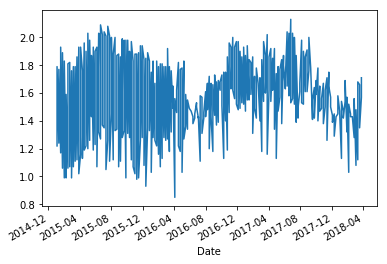

In [10]:
albany_df['AveragePrice'].plot()
plt.show()

This plot has crazy fluctuations. One thing to do is to take a **moving avg** to smoothen it out and better understand the trend

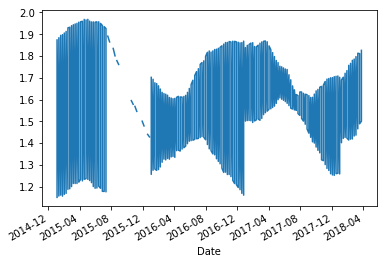

In [11]:
albany_df['AveragePrice'].rolling(25).mean().plot()

Something is wrong. Maybe some stuff is out of order

In [12]:
albany_df.head(25)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
2015-11-22,5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
2015-11-15,6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
2015-11-08,7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
2015-11-01,8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany


In [13]:
albany_df.tail(25)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2017-03-26,40,2.02,2250.22,166.49,263.32,0.0,1820.41,1820.41,0.00,0.0,organic,2017,Albany
2017-03-19,41,1.87,2763.38,503.14,175.98,0.0,2084.26,2084.26,0.00,0.0,organic,2017,Albany
2017-03-12,42,1.97,2001.95,123.51,206.64,0.0,1671.80,1671.80,0.00,0.0,organic,2017,Albany
2017-03-05,43,1.84,2228.14,241.00,208.79,0.0,1778.35,1778.35,0.00,0.0,organic,2017,Albany
2017-02-26,44,1.71,2185.96,508.31,240.10,0.0,1437.55,1437.55,0.00,0.0,organic,2017,Albany
2017-02-19,45,1.67,2523.56,1049.50,141.41,0.0,1332.65,1332.65,0.00,0.0,organic,2017,Albany
2017-02-12,46,1.78,1806.40,119.52,170.57,0.0,1516.31,1516.31,0.00,0.0,organic,2017,Albany
2017-02-05,47,1.72,1753.35,26.75,223.33,0.0,1503.27,1503.27,0.00,0.0,organic,2017,Albany
2017-01-29,48,1.86,1795.81,32.53,123.14,0.0,1640.14,1640.14,0.00,0.0,organic,2017,Albany


At the top (head) dates are in dec order but at the bottom (tail) they are in inc order

In [14]:
albany_df.sort_index(inplace=True)

/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
albany_df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


In [16]:
albany_df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2018-03-11,2,1.68,2570.52,131.67,229.56,0.00,2209.29,2209.29,0.00,0.0,organic,2018,Albany
2018-03-18,1,1.66,3154.45,275.89,297.96,0.00,2580.60,2577.27,3.33,0.0,organic,2018,Albany
2018-03-18,1,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.0,conventional,2018,Albany
2018-03-25,0,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.0,conventional,2018,Albany
2018-03-25,0,1.71,2321.82,42.95,272.41,0.00,2006.46,1996.46,10.00,0.0,organic,2018,Albany


Looks like the prob is fixed. Lets try to graph it again

In [17]:
albany_df['AveragePrice'].rolling(25).mean().head(30)

Date
2015-01-04       NaN
2015-01-04       NaN
2015-01-11       NaN
2015-01-11       NaN
2015-01-18       NaN
2015-01-18       NaN
2015-01-25       NaN
2015-01-25       NaN
2015-02-01       NaN
2015-02-01       NaN
2015-02-08       NaN
2015-02-08       NaN
2015-02-15       NaN
2015-02-15       NaN
2015-02-22       NaN
2015-02-22       NaN
2015-03-01       NaN
2015-03-01       NaN
2015-03-08       NaN
2015-03-08       NaN
2015-03-15       NaN
2015-03-15       NaN
2015-03-22       NaN
2015-03-22       NaN
2015-03-29    1.4660
2015-03-29    1.4580
2015-04-05    1.4328
2015-04-05    1.4604
2015-04-12    1.4600
2015-04-12    1.4584
Name: AveragePrice, dtype: float64

See that the 25th data pt onwards we have not NaN values as we are taking a rolling avg of 25 pts

Let us plot this now

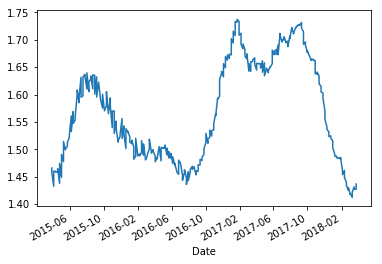

In [18]:
albany_df['AveragePrice'].rolling(25).mean().plot();

This moving avg is an imp feature. Let us make this a new column



In [19]:
albany_df['price25ma'] = albany_df['AveragePrice'].rolling(25).mean()

albany_df.head(30)

/home/shaunak/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,NaN
2015-01-04,51,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,NaN
2015-01-11,50,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,conventional,2015,Albany,NaN
2015-01-11,50,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.00,organic,2015,Albany,NaN
2015-01-18,49,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,conventional,2015,Albany,NaN
2015-01-18,49,1.93,1118.47,8.02,178.78,0.00,931.67,931.67,0.00,0.00,organic,2015,Albany,NaN
2015-01-25,48,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.00,conventional,2015,Albany,NaN
2015-01-25,48,1.89,1115.89,14.87,148.72,0.00,952.30,952.30,0.00,0.00,organic,2015,Albany,NaN
2015-02-01,47,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.00,conventional,2015,Albany,NaN


We want to create a new df where the regions have a separate col and the moving averages are the values

We will create a new df and replicate some of the processes we did for `albany_df`

In [20]:
graph_df = df.copy()

# set index

graph_df.set_index(["Date"], inplace=True)

# sort

graph_df.sort_index(inplace=True)

# create the moving avg column

graph_df['price25ma'] = graph_df['AveragePrice'].rolling(25).mean()

graph_df.head()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,price25ma
Date,,,,,,,,,,,,,,
2015-01-04,51,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast,NaN
2015-01-04,51,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago,NaN
2015-01-04,51,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton,NaN
2015-01-04,51,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh,NaN
2015-01-04,51,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise,NaN


We pivot the data based on region. Since there are multiple rows for same index(Date) we specify an aggregation function

In [21]:
graph_df_pivot = graph_df.pivot_table(index='Date', columns='region', values='price25ma', aggfunc='mean')

In [22]:
graph_df_pivot.head()

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,1.3340,1.3488,1.2854,1.2748,1.3620,1.2960,1.3482,1.2792,1.2832,1.2938,...,1.3322,1.2548,1.2344,1.2508,NaN,1.2796,1.3372,1.2876,1.3396,1.4208
2015-01-11,1.4072,1.3552,1.3370,1.3580,1.3130,1.3748,1.2770,1.3442,1.3318,1.3562,...,1.3676,1.3492,1.3758,1.3194,1.4140,1.3370,1.3600,1.3208,1.4088,1.3558
2015-01-18,1.4276,1.3420,1.3950,1.3334,1.4726,1.4660,1.4140,1.4218,1.3154,1.4696,...,1.4532,1.3318,1.3290,1.3198,1.4400,1.4360,1.4578,1.3836,1.3306,1.4658
2015-01-25,1.3480,1.4918,1.3814,1.4452,1.3728,1.4138,1.3890,1.3768,1.3548,1.4092,...,1.3718,1.3780,1.4326,1.4854,1.4602,1.3746,1.3662,1.3870,1.3156,1.3764
2015-02-01,1.3710,1.2364,1.2732,1.2700,1.2214,1.2330,1.2236,1.2694,1.2982,1.2160,...,1.2490,1.2610,1.3286,1.3210,1.2786,1.2698,1.2842,1.1562,1.2296,1.2854


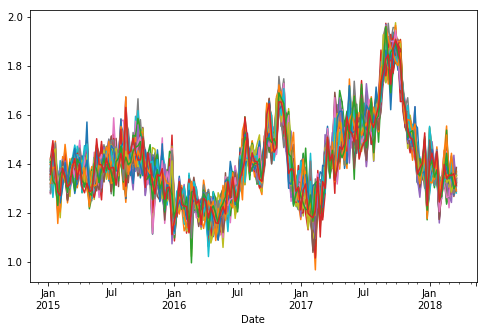

In [23]:
graph_df_pivot.dropna().plot(figsize=(8,5), legend=False);

### Second dataset - Minimum Wage by State Datset

Description of the data:

Year: Year of data

State: State/Territory of data

Table_Data: The scraped, unclean data from the US Department of Labor.

Footnote: The footnote associated with Table_Data, provided by the US Department of Labor.

High.Value: As there were some values in Table_Data that had multiple values (usually associated with footnotes), this is the higher of the two values in the table. It could be useful for viewing the proposed minimum wage, because in most cases, the higher value meant that all persons protected under minimum wage laws eventually had minimum wage set at that value.

Low.Value: This is the same as High.Value, but has the lower of the two values. This could be useful for viewing the effective minimum wage at the year of setting the minimum wage, as peoples protected under such minimum wage laws made that value during that year (although, in most cases, they had a higher minimum wage after that year).

CPI.Average: This is the average Consumer Price Index associated with that year. It was used to calculate 2018-equivalent values.

High.2018: This is the 2018-equivalent dollars for High.Value.

Low.2018: This is the 2018-equivalent dollars for Low.Value.

In [24]:
# pandas by default uses utf-8 The data has Table_Data: The scraped, unclean data from the US Department of Labor. So there might be encoding problems

wage_df = pd.read_csv(filepath_or_buffer='./data/Minimum Wage Data.csv', encoding='latin')

wage_df.head()

,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [25]:
# save the dataset as a new dataset with the proper encoding

wage_df.to_csv(path_or_buf='./data/minwage.csv', encoding='utf-8')

In [26]:
wage_df = pd.read_csv('./data/minwage.csv')

wage_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


Lets group the data by state

In [27]:
gb = wage_df.groupby(by="State")

gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


Iterate over the group

Note : `df[col] returns Series` and `df[[col]] returns a df`

Basically what we want is 

Year (as index) and 2018 Low values for each state in separate cols

So we iterate over each group and join the data of each indv group 

In [28]:
for name, group in wage_df.groupby("State"):
    # name will be the name of the state and group will be the df corr to that state
    print (name, group.head(2))

Alabama     Unnamed: 0  Year    State Table_Data Footnote  High.Value  Low.Value  \
0            0  1968  Alabama        ...      NaN         0.0        0.0   
55          55  1969  Alabama        ...      NaN         0.0        0.0   

    CPI.Average  High.2018  Low.2018  
0     34.783333        0.0       0.0  
55    36.683333        0.0       0.0  
Alaska     Unnamed: 0  Year   State Table_Data Footnote  High.Value  Low.Value  \
1            1  1968  Alaska       2.10      NaN         2.1        2.1   
56          56  1969  Alaska       2.10      NaN         2.1        2.1   

    CPI.Average  High.2018  Low.2018  
1     34.783333      15.12     15.12  
56    36.683333      14.33     14.33  
Arizona     Unnamed: 0  Year    State           Table_Data Footnote  High.Value  \
2            2  1968  Arizona  18.72 - 26.40/wk(b)      (b)        0.66   
57          57  1969  Arizona  18.72 - 26.40/wk(b)      (b)        0.66   

    Low.Value  CPI.Average  High.2018  Low.2018  
2       0.46

In [29]:
# init a df: actual minimum wage

act_min_wage = pd.DataFrame()

# iterate over the group
for name, group in wage_df.groupby("State"):
    
    # if df is emty simply set the df
    
    if act_min_wage.empty:
        # get the group
        act_min_wage = group[["Low.2018", "Year"]]
        # set index
        act_min_wage.set_index("Year", inplace=True)
        # rename col
        act_min_wage.rename(columns={"Low.2018": name}, inplace=True)
        
    else:
        # get the group as a new df
        new_group = group[["Low.2018", "Year"]]
        # set index of the new group
        new_group.set_index("Year", inplace=True)
        # rename col
        new_group.rename(columns={"Low.2018": name}, inplace=True)
        # join with the main df
        act_min_wage = act_min_wage.join(new_group)
    

/home/shaunak/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [30]:
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


Check to see whether we have the data correctly

In [31]:
print (list(wage_df['State'].unique())==list(act_min_wage.columns))

True


Basic stats:

In [32]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


Correlation:

In [33]:
act_min_wage.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.018638,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,...,NaN,-0.522472,0.277016,-0.020462,0.663558,-0.601640,0.411593,0.044814,0.702570,0.727932
Arizona,NaN,0.018638,1.000000,0.089395,0.498994,0.742527,0.458163,0.429836,0.590848,-0.049914,...,NaN,0.369900,-0.758607,0.439344,0.517960,0.047405,0.587975,0.584596,0.131588,0.346528
Arkansas,NaN,-0.377934,0.089395,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,...,NaN,0.503242,-0.204485,0.194680,0.087429,0.582192,-0.072343,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.498994,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,...,NaN,-0.239533,-0.417782,0.392898,0.877922,-0.326364,0.754085,0.371765,0.584067,0.722617


#### Dealing with NaN and missing values

In [34]:
issue_df = wage_df[wage_df['Low.2018'] == 0]

issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [35]:
issue_df.shape

(400, 10)

These are all the states in which the prob exists

In [36]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

One thing we can do is iterate over the data for the states and check if the sum is also 0, that would imply that ALL values are 0

In [37]:
partially_correct_states = []

# group by state
grouped_issues = issue_df.groupby("State")

for state, data in grouped_issues:
    if data['Low.2018'].sum() != 0:
        partially_correct_states.append(state)
        
print(partially_correct_states)

[]


Ok, so there are no partially correct data, if one value is 0 all are 0. So basically we can delete all states with 0 values

In [38]:
act_min_wage.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


Replace all 0 values with NaN

In [39]:
act_min_wage.replace(0, np.NaN, inplace=True)

# drop cols with NaN values 

act_min_wage.dropna(axis=1, inplace=True)

In [41]:
act_min_wage.corr().head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [42]:
min_wage_corr = act_min_wage.corr()

#### Visualizing the corr table

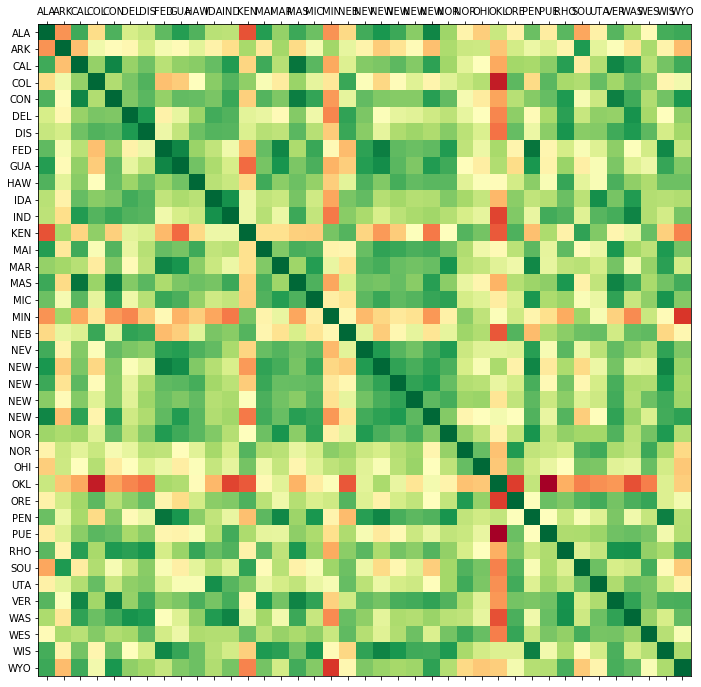

In [55]:
labels = [str(region[:3]).upper() for region in min_wage_corr.columns]

# print (labels)

fig = plt.figure(figsize=(12,12))
# 111: since there will only be 1 graph
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn);

# modify ticks to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#set the labels
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()



#### Get proper state abbr

In [56]:
dfs = pd.read_html('https://www.infoplease.com/state-abbreviations-and-state-postal-codes')

In [62]:
len(dfs)

dfs[0].head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [64]:
# save the 

dfs[0].to_csv('./data/state_abbv.csv', index=False)

In [68]:
# read in the saved csv and make the 1st col index
state_abbv = pd.read_csv('./data/state_abbv.csv', index_col=0)

state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [70]:
abbv_dict = state_abbv[["Postal Code"]].to_dict()

abbv_dict = abbv_dict['Postal Code']

print (abbv_dict)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [79]:
labels = [abbv_dict[c] for c in min_wage_corr.columns]

In [76]:
abbv_dict['Federal (FLSA)'] = 'FLSA'
abbv_dict['Guam'] = 'GM'
abbv_dict['Puerto Rico'] = 'PR'

Plot the corr chart again

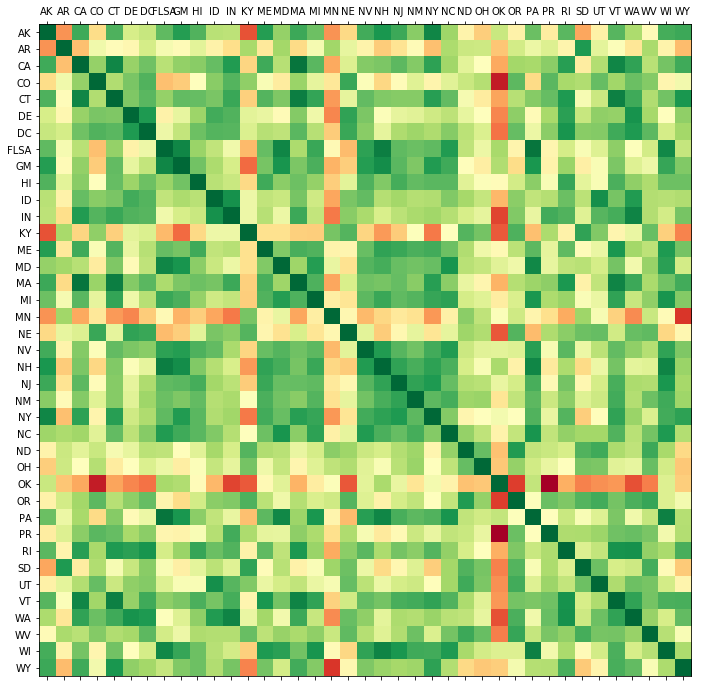

In [80]:

# print (labels)

fig = plt.figure(figsize=(12,12))
# 111: since there will only be 1 graph
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn);

# modify ticks to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#set the labels
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)

plt.show()



### Combining more datasets

We have been working with the dataset of min wage by county

We now want to explore US Unemployment Rate by County, [data link here](https://www.kaggle.com/jayrav13/unemployment-by-county-us)

Sometimes, it's argued that increasing minimum wage makes it so that employing people is more costly, and, as a result, employment may drop.



In [82]:
unemp_county_df = pd.read_csv('./data/output.csv')

unemp_county_df.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


Now we want to combine this data with our min wage data

In [83]:
act_min_wage.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


This min wage data is already cleaned. Now we want to take the min wage and add it as a new col in unemployment dataset

Also one thing to note here is that the min wage data is by state, not by county so there is a slight prob there, but
we chose to ignore that

First we create a function that will get us the min wage by year and state:

In [89]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year, state]
    except KeyError:
        return np.NaN
get_min_wage(2012, "Colorado")

8.33

In [ ]:
%%time

